In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from print_array import *
import time
import scipy.optimize as opt

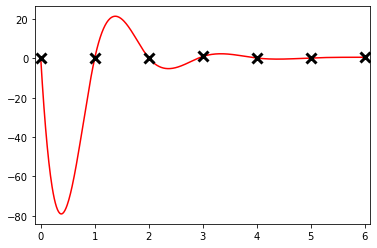

In [14]:
def polyvalue(polyparamvec,x):
    y=0
    for i in range(polyparamvec.shape[0]):
       y+=polyparamvec[i]*x**i
    return y

def piecewise_poly(param,n):
    s=param.shape
    vec=np.zeros([s[0]*n])
    for i in range(s[0]):
       vec[i*n:(i+1)*n]=polyvalue(param[i,:],np.linspace(0,1,num=n,endpoint=False))       
    return vec

plt.figure()
N=6
p=np.random.rand(N+1,1)
A=np.zeros([4*N,4*N])
for i in range(N):
    A[i,4*i]=1
    A[N+i,4*i:4*i+4]=[1,1,1,1]
    A[2*N+i,4*i:4*i+4]=[0,1,2,3]
    A[3*N+i,4*i:4*i+4]=[0,0,2,6]
for i in range(N-1):
    A[2*N+i,4*i:4*i+8]=[0,1,2,3,0,-1,0,0]
    A[3*N+i,4*i:4*i+8]=[0,0,2,6,0,0,-2,0]
    
#A[2*N:3*N-1, :4] = 0
#A[4*N-1, 4*N-2] = 0
#A[4*N-1, 4*N-1] = 0
       
b=np.zeros([4*N,1])
b[:N]=p[:N]
b[N:2*N]=p[1:]
x=np.linalg.inv(A).dot(b)


Np=100
plt.plot(np.linspace(0,N,num=Np*N),piecewise_poly(np.reshape(x,[N,4]),Np),'r')

plt.plot(p,linestyle='None',marker='x', markersize=10, markeredgewidth=3, color='black')
plt.xlim([-0.1,N+0.1])
plt.show()

In [ ]:
#complete search script 

import matplotlib.pyplot as plt
import numpy as np
import time

#create a guassian test function
x1=np.random.uniform(1,4);x2=np.random.uniform(1,4)
sig1=np.random.uniform(0.05,5); sig2=np.random.uniform(0.05,5); theta=np.random.uniform(0,2*np.pi)
f=lambda x: -np.exp(-0.5*((((x[0]-x1)*np.cos(theta)-(x[1]-x2)*np.sin(theta))/sig1)**2+(((x[0]-x1)*np.sin(theta)+(x[1]-x2)*np.cos(theta))/sig2)**2))/(sig1*2*np.pi*sig2)
xmin=0; xmax=5; ymin=0; ymax=5 #boundaries for search
acc=0.05 #accuracy 
show=True
xy=np.mgrid[xmin:xmax:acc,ymin:ymax:acc]
fgrid=f(xy)
fig=plt.figure(figsize=(12,12))
fig.add_subplot(1,1,1)
if show:
    p=plt.imshow(fgrid.T[::-1,:], interpolation = 'nearest',cmap='jet_r', extent=[xmin,xmax,ymin,ymax])
    #plt.show()
t0 = time.time()
minxpos=xmin;
minypos=ymin;
minval=f([minxpos,minypos]);

for i in np.arange(xmin,xmax,acc):
    for j in np.arange(ymin,ymax,acc):
        if (f([i,j])<f([minxpos,minypos])):
            minxpos=i;
            minypos=j;
            print('new minimum at (',minxpos,',',minypos,') f=',f([minxpos,minypos]) , (minxpos-xmin)/acc,(minypos-ymin)/acc)
            if show:
                plt.scatter(minxpos,minypos,color='black')
                plt.draw()
                plt.pause(0.01)
print('minimum at (',x1,',',x2,'), minimum found at (',minxpos,',',minypos,')')
if show:
    plt.show()
t1 = time.time()

print('time needed for search:', t1-t0,'s')


minimum at ( 2.078675181511297 , 1.0523288667550499 ), minimum found at ( 2.1 , 1.05 )


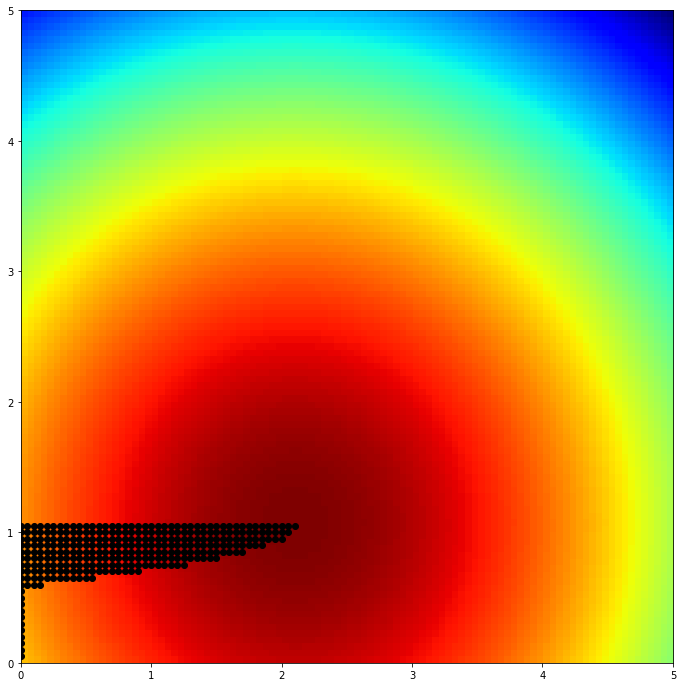

time needed for search: 2.964181900024414 s


In [3]:
#complete search script edited to work

import matplotlib.pyplot as plt
import numpy as np
import time

#create a guassian test function
x1=np.random.uniform(1,4);x2=np.random.uniform(1,4)
sig1=np.random.uniform(0.05,5); sig2=np.random.uniform(0.05,5); theta=np.random.uniform(0,2*np.pi)
f=lambda x: -np.exp(-0.5*((((x[0]-x1)*np.cos(theta)-(x[1]-x2)*np.sin(theta))/sig1)**2+(((x[0]-x1)*np.sin(theta)+(x[1]-x2)*np.cos(theta))/sig2)**2))/(sig1*2*np.pi*sig2)
xmin=0; xmax=5; ymin=0; ymax=5 #boundaries for search
acc=0.05 #accuracy 
show=True
xy=np.mgrid[xmin:xmax:acc,ymin:ymax:acc]
fgrid=f(xy)
fig, axs = plt.subplots(1,1,figsize=(12,12))


t0 = time.time()
minxpos=xmin;
minypos=ymin;
minval=f([minxpos,minypos]);

for i in np.arange(xmin,xmax,acc):
    for j in np.arange(ymin,ymax,acc):
        if (f([i,j])<f([minxpos,minypos])):
            minxpos=i;
            minypos=j;
            #print('new minimum at (',minxpos,',',minypos,') f=',f([minxpos,minypos]) , (minxpos-xmin)/acc,(minypos-ymin)/acc)
            if show:
                plt.scatter(minxpos,minypos,color='black')
                #plt.draw()
                #plt.pause(0.01)
                
                
print('minimum at (',x1,',',x2,'), minimum found at (',minxpos,',',minypos,')')

if show:
    p=plt.imshow(fgrid.T[::-1,:], interpolation = 'nearest',cmap='jet_r', extent=[xmin,xmax,ymin,ymax])
    plt.show()

t1 = time.time()

print('time needed for search:', t1-t0,'s')


2.5 2.5
minimum at ( 3.065084091928678 , 1.4993731109224275 ), minimum found at ( 3.0439135921872733 , 1.5035941718627661 )


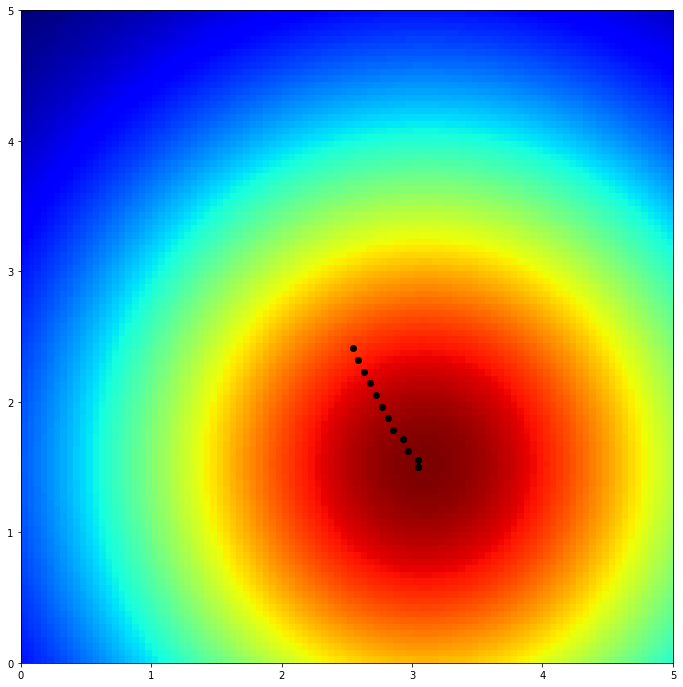

time needed for search: 0.42171382904052734 s


In [6]:
#complete search script edited to be faster

import matplotlib.pyplot as plt
import numpy as np
import time

#create a guassian test function
x1=np.random.uniform(1,4);x2=np.random.uniform(1,4)
sig1=np.random.uniform(0.05,5); sig2=np.random.uniform(0.05,5); theta=np.random.uniform(0,2*np.pi)
f=lambda x: -np.exp(-0.5*((((x[0]-x1)*np.cos(theta)-(x[1]-x2)*np.sin(theta))/sig1)**2+(((x[0]-x1)*np.sin(theta)+(x[1]-x2)*np.cos(theta))/sig2)**2))/(sig1*2*np.pi*sig2)
xmin=0; xmax=5; ymin=0; ymax=5 #boundaries for search
acc=xmax/100 #accuracy 
show=True
xy=np.mgrid[xmin:xmax:acc,ymin:ymax:acc]
fgrid=f(xy)
fig, axs = plt.subplots(1,1,figsize=(12,12))


t0 = time.time()

                
#alternative loop

found = False
x_coord = np.arange(xmin, xmax, acc)
y_coord = np.arange(ymin, ymax, acc)
x_center = x_min = x_coord[int(len(x_coord)/2)]
y_center = y_min = y_coord[int(len(y_coord)/2)]
compare_coord = np.array(((0,1),(np.sqrt(0.5),np.sqrt(0.5)),(1,0),(np.sqrt(0.5),-np.sqrt(0.5)),(0,-1)\
                          ,(-np.sqrt(0.5),-np.sqrt(0.5)),(-1,0),(-np.sqrt(0.5),np.sqrt(0.5)),(0,2),(-1*np.sqrt(4/1.25)/2,2*np.sqrt(4/1.25)/2)\
                          ,(-2*np.sqrt(0.5),2*np.sqrt(0.5)),(-2*np.sqrt(4/1.25)/2,1*np.sqrt(4/1.25)/2),(-2,0),(-2*np.sqrt(4/1.25)/2,-1*np.sqrt(4/1.25)/2)\
                          ,(-2*np.sqrt(0.5),-2*np.sqrt(0.5)),(-1*np.sqrt(4/1.25)/2,-2*np.sqrt(4/1.25)/2),(0,-2)\
                          ,(1*np.sqrt(4/1.25)/2,-2*np.sqrt(4/1.25)/2),(2*np.sqrt(0.5),-2*np.sqrt(0.5)),(2*np.sqrt(4/1.25)/2,-1*np.sqrt(4/1.25)/2)\
                          ,(2,0),(2*np.sqrt(4/1.25)/2,1*np.sqrt(4/1.25)/2),(2*np.sqrt(0.5),2*np.sqrt(0.5)),(1*np.sqrt(4/1.25)/2,2*np.sqrt(4/1.25)/2)))

print(x_center, y_center)

while(found == False):
    if(x_center+1<=xmax and x_center-1>=xmin and y_center+1<=ymax and y_center-1>=ymin):
        for i,j in compare_coord:
            if( f([x_center+i*acc,y_center+j*acc]) < f([x_min, y_min]) ):
                x_min = x_center + i*acc
                y_min = y_center + j*acc
        if(x_min == x_center and y_min == y_center):
            found = True
            plt.scatter(x_center,y_center,color='black')
        else:
            x_center = x_min
            y_center = y_min
            plt.scatter(x_center,y_center,color='black')
    else:
        found = True
                
print('minimum at (',x1,',',x2,'), minimum found at (',x_min,',',y_min,')')

if show:
    p=plt.imshow(fgrid.T[::-1,:], interpolation = 'nearest',cmap='jet_r', extent=[xmin,xmax,ymin,ymax])
    plt.show()

t1 = time.time()

print('time needed for search:', t1-t0,'s')


In [10]:
def unknown_function(x): #no peeking!!!

    f0=1;f1=(1-x[0])**2+(1-x[0])**2-(1-x[0])**3+(1-(1))**2;f2=(1-x[0])**3+(1-3*x[0])**2-(1-x[0])**3+(1-(1))**2;f3=(1-x[0])**2+(1+x[0])**2-(1-x[0])**3+(1-(1))**2+f1;f4=(1-x[0]**2)**2+(1+x[0]**2)-f2+(1-x[0])**3;f5=f0*(x[1]-x[0]**2)**2;f6=f0*(x[1]-x[0]**2)**2-f1;f7=10*f5;f8=f7/f0+f1-(1-x[0])**2;f9=1*f2+10*f7+0*f8;f10=f1+f3+f9-f1-f3;
    return f10

minimum at ( 3.065084091928678 , 1.4993731109224275 ), minimum found at ( 0.3299999999999397 , 0.11000000000000143 )
time needed for search: 8.640110969543457 s


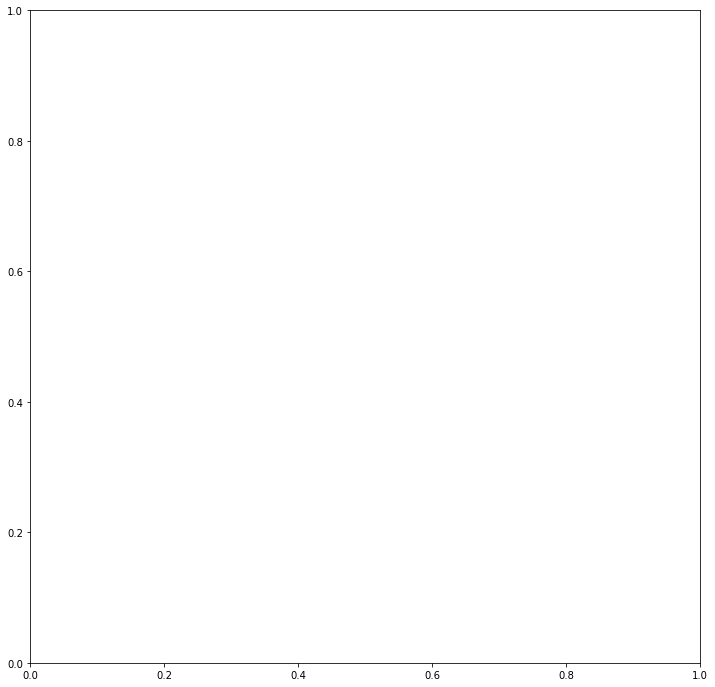

In [20]:
#complete search script edited to work

import matplotlib.pyplot as plt
import numpy as np
import time

#call unknown function

f = unknown_function
xmin=-2.5; xmax=2.5; ymin=-1.5; ymax=3.5 #boundaries for search
acc = (xmax-xmin)/500 #accuracy 
show=False
xy=np.mgrid[xmin:xmax:acc,ymin:ymax:acc]
fgrid=f(xy)
fig, axs = plt.subplots(1,1,figsize=(12,12))


t0 = time.time()
minxpos=xmin;
minypos=ymin;
minval=f([minxpos,minypos]);

for i in np.arange(xmin,xmax,acc):
    for j in np.arange(ymin,ymax,acc):
        if (f([i,j])<f([minxpos,minypos])):
            minxpos=i;
            minypos=j;
            #print('new minimum at (',minxpos,',',minypos,') f=',f([minxpos,minypos]) , (minxpos-xmin)/acc,(minypos-ymin)/acc)
            if show:
                plt.scatter(minxpos,minypos,color='black')
                #plt.draw()
                #plt.pause(0.01)
                
                
print('minimum at (',x1,',',x2,'), minimum found at (',minxpos,',',minypos,')')

if show:
    p=plt.imshow(fgrid.T[::-1,:], interpolation = 'nearest',cmap='jet_r', extent=[xmin,xmax,ymin,ymax])
    plt.show()

t1 = time.time()

print('time needed for search:', t1-t0,'s')


-5.3290705182007514e-14 1.0000000000000022
minimum at ( 3.065084091928678 , 1.4993731109224275 ), minimum found at ( 0.3260332046211186 , 0.10796932055627236 )
time needed for search: 0.05100536346435547 s


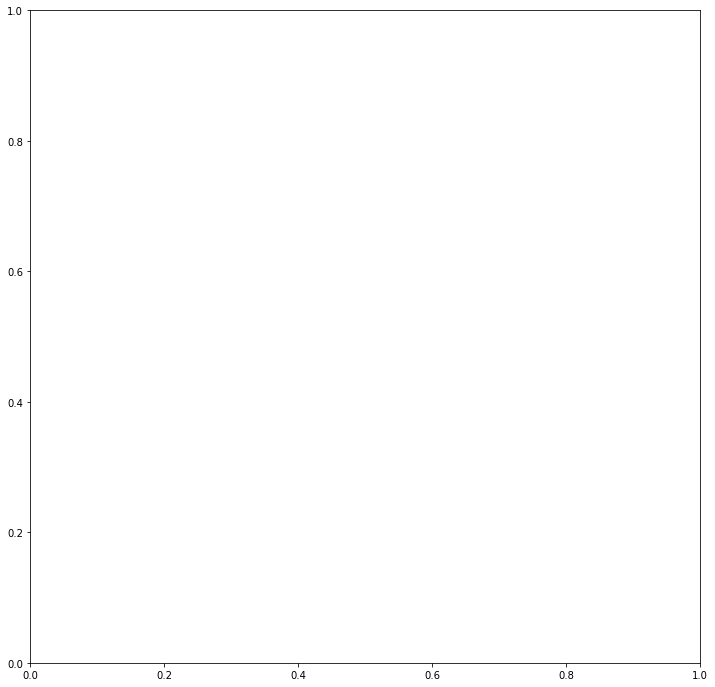

In [21]:
#complete search script edited to be faster for unknown function


#call the unknown function
f = unknown_function
xmin=-2.5; xmax=2.5; ymin=-1.5; ymax=3.5 #boundaries for search
acc=(xmax-xmin)/500 #accuracy 
show=False
xy=np.mgrid[xmin:xmax:acc,ymin:ymax:acc]
fgrid=f(xy)
fig, axs = plt.subplots(1,1,figsize=(12,12))


t0 = time.time()

                
#alternative loop

found = False
x_coord = np.arange(xmin, xmax, acc)
y_coord = np.arange(ymin, ymax, acc)
x_center = x_min = x_coord[int(len(x_coord)/2)]
y_center = y_min = y_coord[int(len(y_coord)/2)]
compare_coord = np.array(((0,1),(np.sqrt(0.5),np.sqrt(0.5)),(1,0),(np.sqrt(0.5),-np.sqrt(0.5)),(0,-1)\
                          ,(-np.sqrt(0.5),-np.sqrt(0.5)),(-1,0),(-np.sqrt(0.5),np.sqrt(0.5)),(0,2),(-1*np.sqrt(4/1.25)/2,2*np.sqrt(4/1.25)/2)\
                          ,(-2*np.sqrt(0.5),2*np.sqrt(0.5)),(-2*np.sqrt(4/1.25)/2,1*np.sqrt(4/1.25)/2),(-2,0),(-2*np.sqrt(4/1.25)/2,-1*np.sqrt(4/1.25)/2)\
                          ,(-2*np.sqrt(0.5),-2*np.sqrt(0.5)),(-1*np.sqrt(4/1.25)/2,-2*np.sqrt(4/1.25)/2),(0,-2)\
                          ,(1*np.sqrt(4/1.25)/2,-2*np.sqrt(4/1.25)/2),(2*np.sqrt(0.5),-2*np.sqrt(0.5)),(2*np.sqrt(4/1.25)/2,-1*np.sqrt(4/1.25)/2)\
                          ,(2,0),(2*np.sqrt(4/1.25)/2,1*np.sqrt(4/1.25)/2),(2*np.sqrt(0.5),2*np.sqrt(0.5)),(1*np.sqrt(4/1.25)/2,2*np.sqrt(4/1.25)/2)))

print(x_center, y_center)

while(found == False):
    if(x_center+1<=xmax and x_center-1>=xmin and y_center+1<=ymax and y_center-1>=ymin):
        for i,j in compare_coord:
            if( f([x_center+i*acc,y_center+j*acc]) < f([x_min, y_min]) ):
                x_min = x_center + i*acc
                y_min = y_center + j*acc
        if(x_min == x_center and y_min == y_center):
            found = True
            #plt.scatter(x_center,y_center,color='black')
        else:
            x_center = x_min
            y_center = y_min
            #plt.scatter(x_center,y_center,color='black')
    else:
        found = True
                
print('minimum at (',x1,',',x2,'), minimum found at (',x_min,',',y_min,')')

if show:
    p=plt.imshow(fgrid.T[::-1,:], interpolation = 'nearest',cmap='jet_r', extent=[xmin,xmax,ymin,ymax])
    plt.show()

t1 = time.time()

print('time needed for search:', t1-t0,'s')
